#### References
* Dataset - https://www.kaggle.com/c/digit-recognizer
* Visualizing MNIST - http://colah.github.io/posts/2014-10-Visualizing-MNIST/
* Misread t-SNE - https://distill.pub/2016/misread-tsne/

## t-SNE MNSIT

In [2]:
## Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
## Read the input csv file
data = pd.read_csv('mnist.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
## Separate the features and class label in X and y dataframes respectively
y = data['label']
X = data.drop('label', axis = 1)
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
from sklearn.preprocessing import StandardScaler
## Create an object of the class
X_std = StandardScaler().fit_transform(X)    ## fit_transform() method performs the standardization on the individual columns
X_std[:6, :]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [6]:
X_5000 = X_std[:5000, :]
y_5000 = y[:5000]

In [7]:
from sklearn.manifold import TSNE

In [8]:
## Create onject of class TSNE
model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

## fit_transform() method performs all the t-SNE calculations and returns the required number of components in a NumPy Array
tsne = model.fit_transform(X_5000)

In [9]:
## Quick Check
tsne[:5, :]

array([[ -7.79954243,  46.29202652],
       [-40.33703232, -45.53474426],
       [ 27.35626221, -22.65831757],
       [ 57.74459839,  -7.08032799],
       [-49.67733383, -48.62966156]], dtype=float32)

Convert the NumPy Array into a Pandas DataFrame so that we can use it to plot using Seaborn or Pyplot

In [10]:
df = pd.DataFrame(tsne, columns = ('dim1', 'dim2'))
df.head()

,dim1,dim2
0,-7.799542,46.292027
1,-40.337032,-45.534744
2,27.356262,-22.658318
3,57.744598,-7.080328
4,-49.677334,-48.629662


We need to concatenate the species column to the DataFrame for the purpose of visualization

In [11]:
df = pd.concat([df, y_5000], axis = 1)
df.head()

,dim1,dim2,label
0,-7.799542,46.292027,1
1,-40.337032,-45.534744,0
2,27.356262,-22.658318,1
3,57.744598,-7.080328,4
4,-49.677334,-48.629662,0


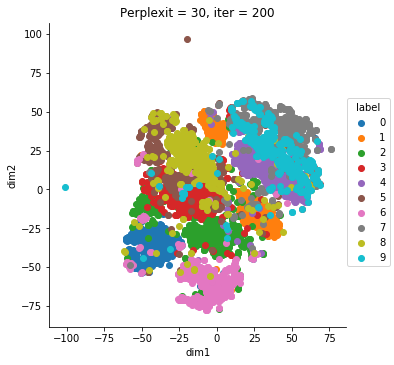

In [13]:
sns.FacetGrid(df, hue = 'label', size = 5).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.title('Perplexity = 30, iter = 200')

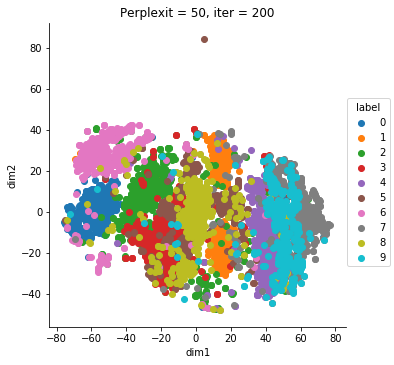

In [15]:
## Changing the perplexity to 50
model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne = model.fit_transform(X_5000)

df = pd.DataFrame(tsne, columns = ('dim1', 'dim2'))
df = pd.concat([df, y_5000], axis = 1)

sns.FacetGrid(df, hue = 'label', size = 5).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.title('Perplexity = 50, iter = 200')

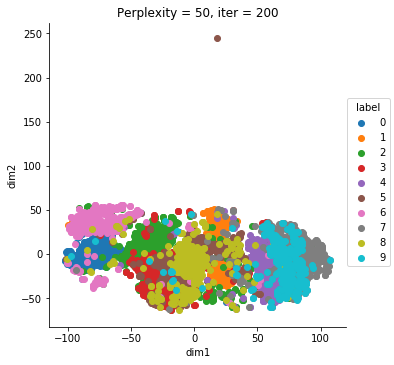

In [8]:
## Changing the n_iter to 5000
model = TSNE(n_components=2, random_state=0, perplexity=50,  n_iter=2000)
tsne = model.fit_transform(X_5000)

df = pd.DataFrame(tsne, columns = ('dim1', 'dim2'))
df = pd.concat([df, y_5000], axis = 1)

sns.FacetGrid(df, hue = 'label', size = 5).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.title('Perplexity = 50, iter = 2000')

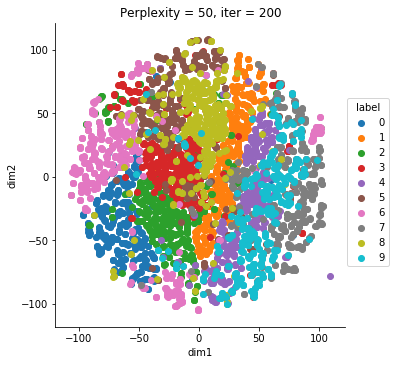

In [9]:
## Perplexity = 2 (very low), absurd output
model = TSNE(n_components=2, random_state=0, perplexity=2)
tsne = model.fit_transform(X_5000)

df = pd.DataFrame(tsne, columns = ('dim1', 'dim2'))
df = pd.concat([df, y_5000], axis = 1)

sns.FacetGrid(df, hue = 'label', size = 5).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.title('Perplexity = 2, n_iter = 1000')

#### Excercise: Run the same analysis using 42K points with various values of perplexity and iterations.